# eWRC Rally Console

Simple notebook for generating eWRC results and charts.

This notebook is intended to be a step towards a voila dashboard that will allow interactive exploration of the data views.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from rallyview_charts import *

In [105]:
# TO DO - we need to have a proper way of identifying and loading particular rallies
rally_stub = '60140-rally-sweden-2020'
#rally_stub='61968-snetterton-stages-2020/'
ewrc = EWRC(rally_stub, live=True)

## Rally Review Chart

A widget driven view that allows you to generate a rally review chart, with optional selectors for rebasing and class filtering.

In [106]:
ewrc.get_entry_list()

import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import Image

classes = widgets.Dropdown(
    #Omit car 0
    options=['All']+ewrc.df_entry_list[ewrc.df_entry_list['CarNum']!='#0']['Class'].dropna().unique().tolist(),
    value='All', description='Class:', disabled=False )


carNum = widgets.Dropdown(
    options=ewrc.carsInClass(classes.value),
    description='Car:', disabled=False)

def update_drivers(*args):
    carlist = ewrc.carsInClass(classes.value)
    carNum.options = carlist
    
classes.observe(update_drivers, 'value')

In [107]:
from ipywidgets import fixed
interact(rally_report2, ewrc=fixed(ewrc), cl=classes, carNum=carNum);

interactive(children=(Dropdown(description='Class:', options=('All', 'RC1', 'RC2', 'RC4', 'NAT4'), value='All'…

## Off the Pace Charts

Generate an off-the-pace chart.

TO DO - widgets for class and driver rebase selection.

In [95]:
ostberg = '/entryinfo/60140-rally-sweden-2020/2498361/'
tanak = '/entryinfo/60140-rally-sweden-2020/2494761/'
evans = '/entryinfo/60140-rally-sweden-2020/2496932/'

rovanpera = '/entryinfo/60140-rally-sweden-2020/2496933/'
ogier='/entryinfo/60140-rally-sweden-2020/2496931/'

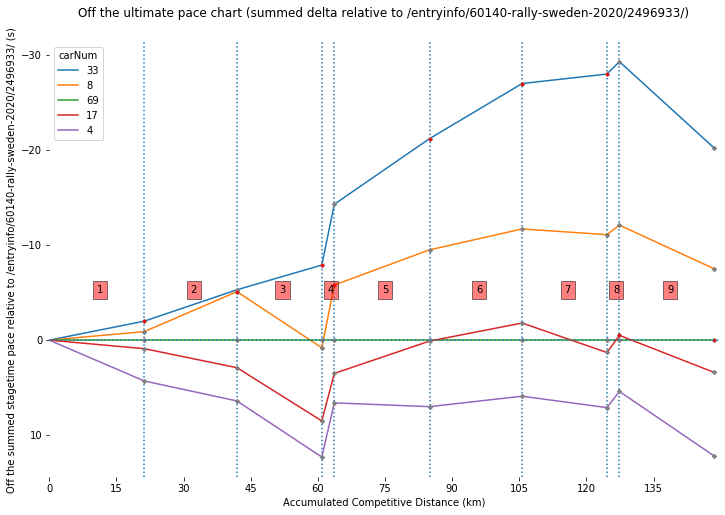

In [131]:
off_the_pace_chart(ewrc, filename='testpng/offpace_rov.png', rebase=rovanpera, rally_class='all'); #rebase=rovanpera,

## Pace Map

Generate pace maps.

TO DO - widget selection for class and rebase. Further optional selector for comparison driver.

TO DO  - broken for class RC1?

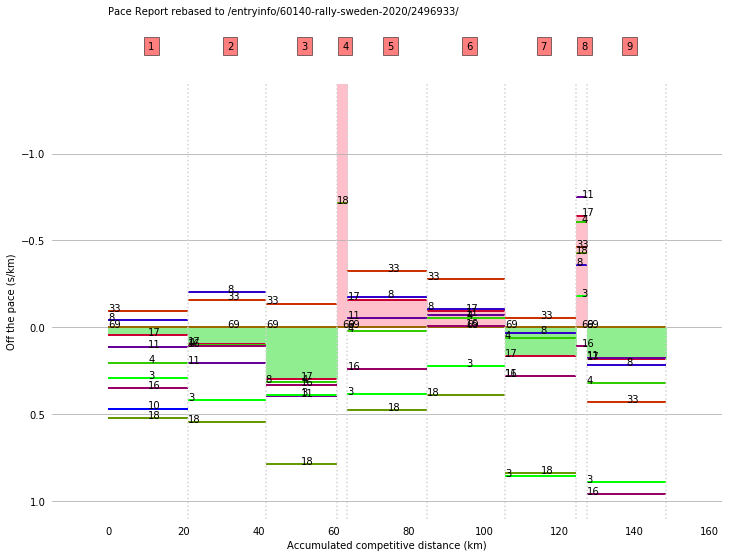

In [133]:
pace_map(ewrc, PACEMAX=1, stretch=True, rally_class='RC1', rebase=rovanpera,
         compared_with=ogier,
         filename='testpng/pacemap_rov_ogi.png');

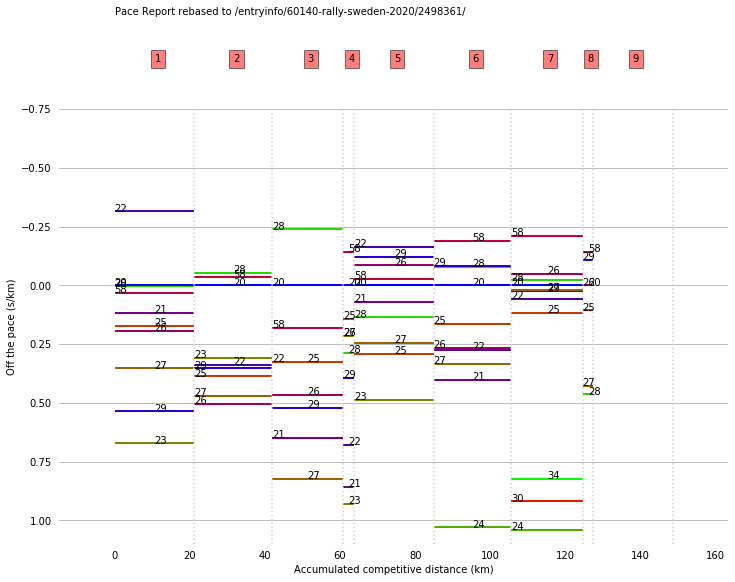

In [92]:
pace_map(ewrc, PACEMAX=1, stretch=True, rally_class='RC2',
         rebase=ostberg, filename='testpng/pacemap_ost.png');

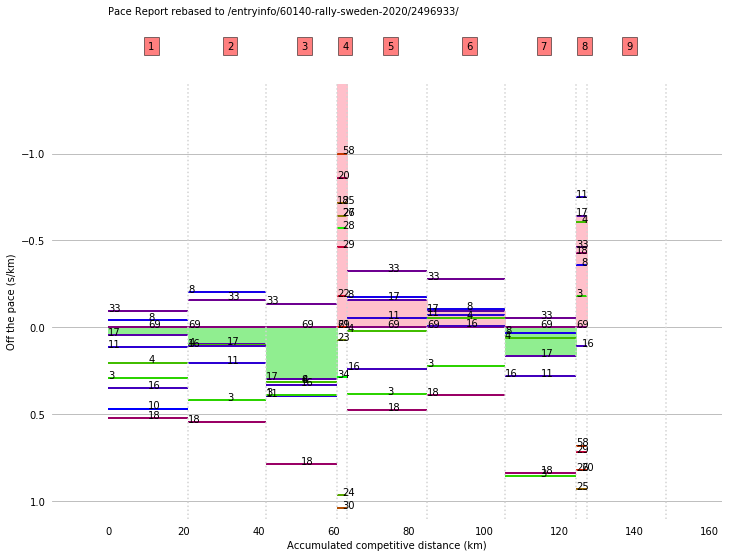

In [97]:
pace_map(ewrc, PACEMAX=1, stretch=True, rebase=rovanpera,
        compared_with=ogier, filename='testpng/pacemap_rov_ogi.png');

     index                                      entryId  value carNum      x0  \
0        1  /entryinfo/60140-rally-sweden-2020/2501348/  1.787     58    0.00   
1        2  /entryinfo/60140-rally-sweden-2020/2501348/  1.649     58   21.26   
2        3  /entryinfo/60140-rally-sweden-2020/2501348/  2.038     58   41.94   
3        4  /entryinfo/60140-rally-sweden-2020/2501348/  1.357     58   60.88   
4        5  /entryinfo/60140-rally-sweden-2020/2501348/  1.924     58   63.68   
..     ...                                          ...    ...    ...     ...   
114      3  /entryinfo/60140-rally-sweden-2020/2501778/    NaN     31   41.94   
115      4  /entryinfo/60140-rally-sweden-2020/2501778/    NaN     31   60.88   
116      5  /entryinfo/60140-rally-sweden-2020/2501778/    NaN     31   63.68   
117      6  /entryinfo/60140-rally-sweden-2020/2501778/    NaN     31   84.94   
118      7  /entryinfo/60140-rally-sweden-2020/2501778/    NaN     31  105.62   

         x1      xm  
0    

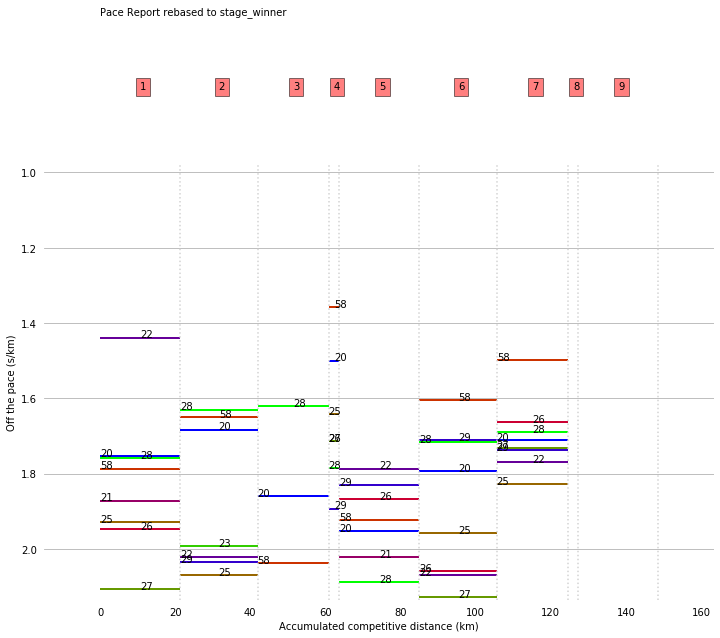

In [76]:
pace_map(ewrc, PACEMAX=1, stretch=True, rally_class='RC2',
         filename='testpng/pacemap_RC2.png');

In [19]:
tanak = '/entryinfo/60140-rally-sweden-2020/2494761/'
evans = '/entryinfo/60140-rally-sweden-2020/2496932/'

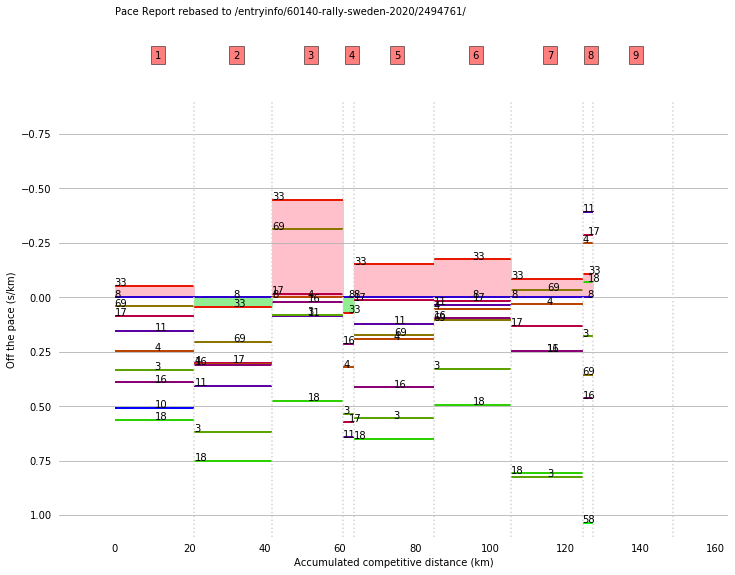

In [90]:
pace_map(ewrc, PACEMAX=1, stretch=True, rebase=tanak,
        compared_with=evans, filename='testpng/pacemap_tan_ev.png');

In [14]:
ewrc.get_stage_times()[0].head()

,driverNav,driver,navigator,carNum,carModel,retired,Pos,stagetimes,overalltimes,positions,penalties
entryId,,,,,,,,,,,
/entryinfo/60140-rally-sweden-2020/2496932/,Evans Elfyn - Martin Scott,Evans Elfyn,Martin Scott,33,Toyota Yaris WRC,False,,"[9:43.9, 10:14.3, 9:02.9, 1:42.6, 9:25.2, 9:53...","[9:43.9, 19:58.2, 29:01.1, 30:43.7, 40:08.9, 5...","[1, 1, 1, 1, 1, 1, 1]","[0, 0, 0, 0, 0, 0, 0]"
/entryinfo/60140-rally-sweden-2020/2494761/,Tänak Ott - Järveoja Martin,Tänak Ott,Järveoja Martin,8,Hyundai i20 Coupe WRC,False,,"[9:45.0, 10:13.4, 9:11.4, 1:42.4, 9:28.4, 9:57...","[9:45.0, 19:58.4, 29:09.8, 30:52.2, 40:20.6, 5...","[2, 2, 3, 2, 2, 2, 2]","[0, 0, 0, 0, 0, 0, 0]"
/entryinfo/60140-rally-sweden-2020/2496933/,Rovanperä Kalle - Halttunen Jonne,Rovanperä Kalle,Halttunen Jonne,69,Toyota Yaris WRC,False,,"[9:45.9, 10:17.6, 9:05.5, 1:49.0, 9:32.1, 9:59...","[9:45.9, 20:03.5, 29:09.0, 30:58.0, 40:30.1, 5...","[3, 3, 2, 3, 3, 4, 3]","[0, 0, 0, 0, 0, 0, 0]"
/entryinfo/60140-rally-sweden-2020/2496931/,Ogier Sébastien - Ingrassia Julien,Ogier Sébastien,Ingrassia Julien,17,Toyota Yaris WRC,False,,"[9:46.8, 10:19.6, 9:11.1, 1:44.0, 9:28.7, 9:57...","[9:46.8, 20:06.4, 29:17.5, 31:01.5, 40:30.2, 5...","[4, 4, 4, 4, 4, 3, 4]","[0, 0, 0, 0, 0, 0, 0]"
/entryinfo/60140-rally-sweden-2020/2501811/,Lappi Esapekka - Ferm Janne,Lappi Esapekka,Ferm Janne,4,Ford Fiesta WRC,False,,"[9:50.2, 10:19.7, 9:11.4, 1:43.3, 9:32.5, 9:58...","[9:50.2, 20:09.9, 29:21.3, 31:04.6, 40:37.1, 5...","[6, 5, 5, 5, 5, 5, 5]","[0, 0, 0, 0, 0, 0, 0]"
